# Prever o valor do valor médio de casas em Boston

- RM: Média de cômodos entre os imóveis e bairro
- LSTAT: a porcentagem de propriétarios no bairro, considerados como classe baixa
- PTRATIO: razão entre estudantes e professores nas escolas de ensino fundamental no bairro
- MEDV: Valor médio das casas

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style="dark")

In [140]:
df = pd.read_csv('housing.csv', sep=',', encoding='iso-8859-1')

In [141]:
df.shape

(489, 4)

In [142]:
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       489 non-null    float64
 1   LSTAT    489 non-null    float64
 2   PTRATIO  489 non-null    float64
 3   MEDV     489 non-null    float64
dtypes: float64(4)
memory usage: 15.4 KB


In [145]:
df.isnull().sum()

RM         0
LSTAT      0
PTRATIO    0
MEDV       0
dtype: int64

## Dados Estatísticos

In [146]:
df.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


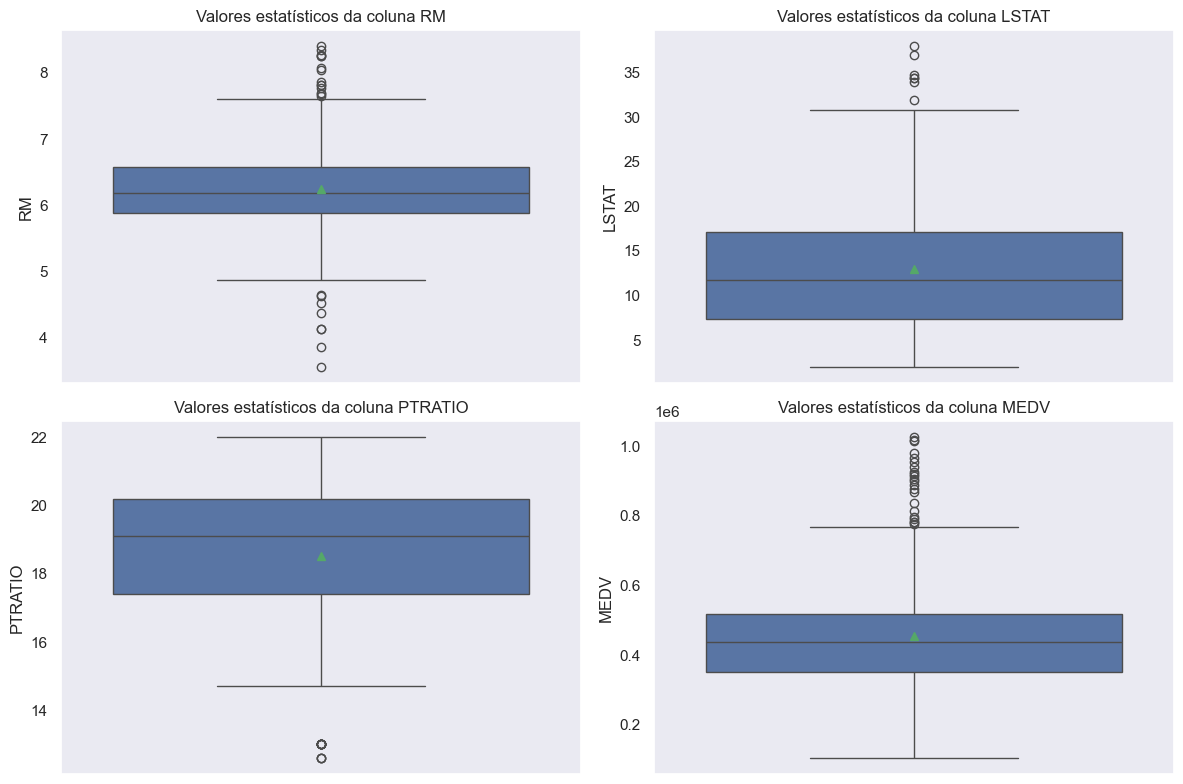

In [195]:
num_cols = 2  
num_rows = math.ceil(len(df.columns) / num_cols)  

fig, ax = plt.subplots(num_rows, num_cols, figsize=(12, 8), constrained_layout=True)
ax = ax.flatten() 

for i, col in enumerate(df.columns):
    sns.boxplot(data=df, y=col, showmeans=True, ax=ax[i])
    ax[i].set_title(f'Valores estatísticos da coluna {col}')

for i in range(len(df.columns), len(ax)):
    fig.delaxes(ax[i])
    
plt.tight_layout()
plt.show()

## Relações entre as colunas

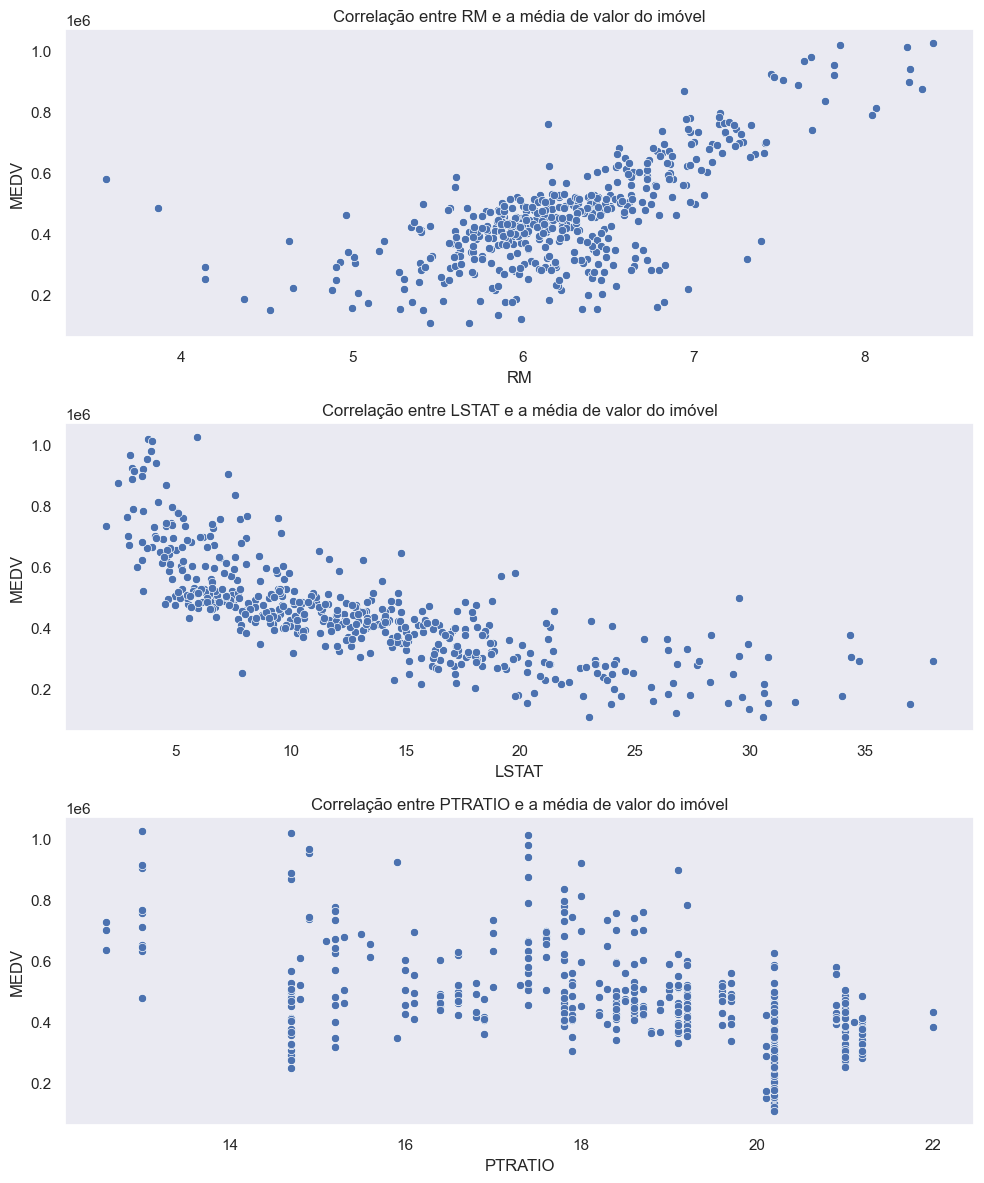

In [ ]:
preditoras = [col for col in df.columns if col !='MEDV']

num_cols = 1
num_rows = math.ceil(len(preditoras)/num_cols)

fig,ax = plt.subplots(num_rows,num_cols, figsize=(10, 12))
ax = ax.flatten()

for i, col in enumerate(preditoras):
    sns.scatterplot(df, x=col, y= 'MEDV', ax=ax[i])
    ax[i].set_title(f'Correlação entre {col} e a média de valor do imóvel')
   
for i in range(len(preditoras), len(ax)):
    ax[i].set_visible(False)
    
plt.tight_layout()
plt.show()

## Análise da Normalidade das Colunas
- Utilização de Q-Q plot, histograma e o teste de Lilliefors para avaliar a normalidade das variáveis. O Q-Q plot e o histograma fornecem uma análise visual, enquanto o teste de Lilliefors é usado para testar estatisticamente a normalidade das distribuições (se o p-valor > 0.05), ajudando a decidir se as variáveis seguem uma distribuição normal.

In [178]:
import scipy.stats as stats
import statsmodels
from statsmodels.stats.diagnostic import lilliefors

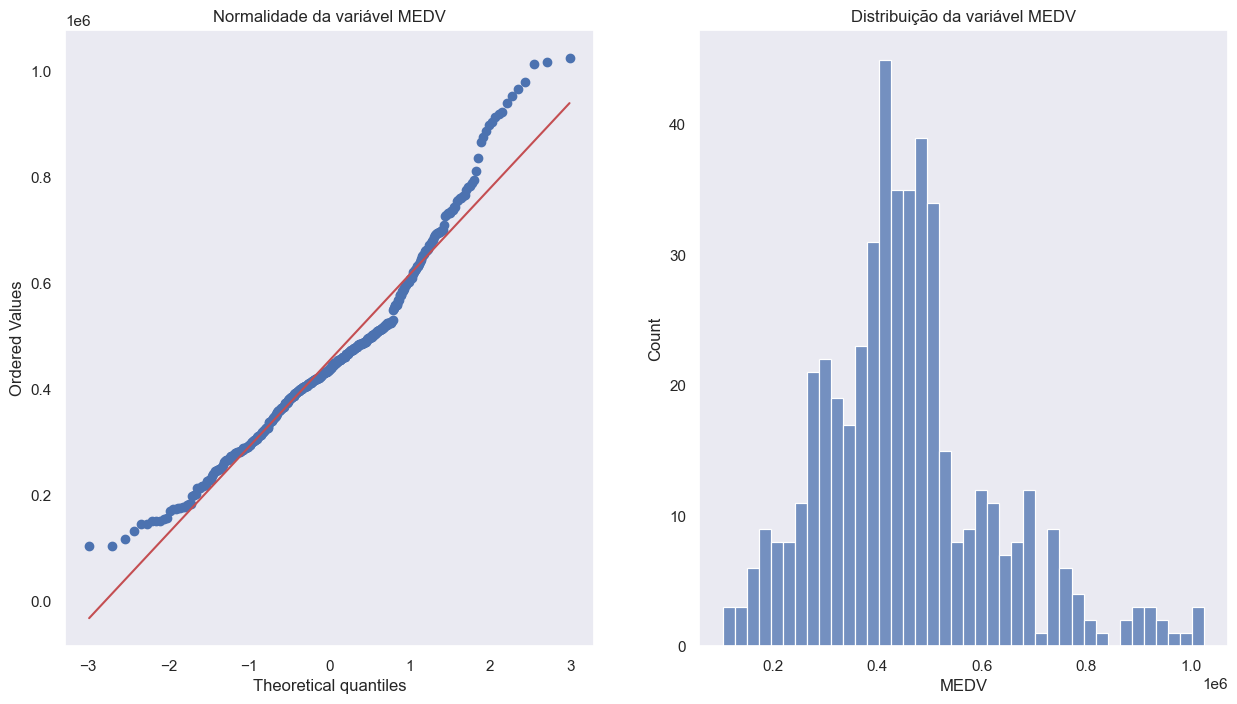

In [169]:
fig, ax = plt.subplots(1,2, figsize=(15, 8))

stats.probplot(df.MEDV, dist='norm', plot=ax[0])
ax[0].set_title('Normalidade da variável MEDV')

sns.histplot(df, x='MEDV', bins=40, ax=ax[1])
ax[1].set_title('Distribuição da variável MEDV')
plt.show()

In [179]:
estatistica, p = lilliefors(df.MEDV, dist='norm')
print(f'Estatística do teste {estatistica}')
print(f'p-valor {p}')

Estatística do teste 0.11370576407672117
p-valor 0.0009999999999998899


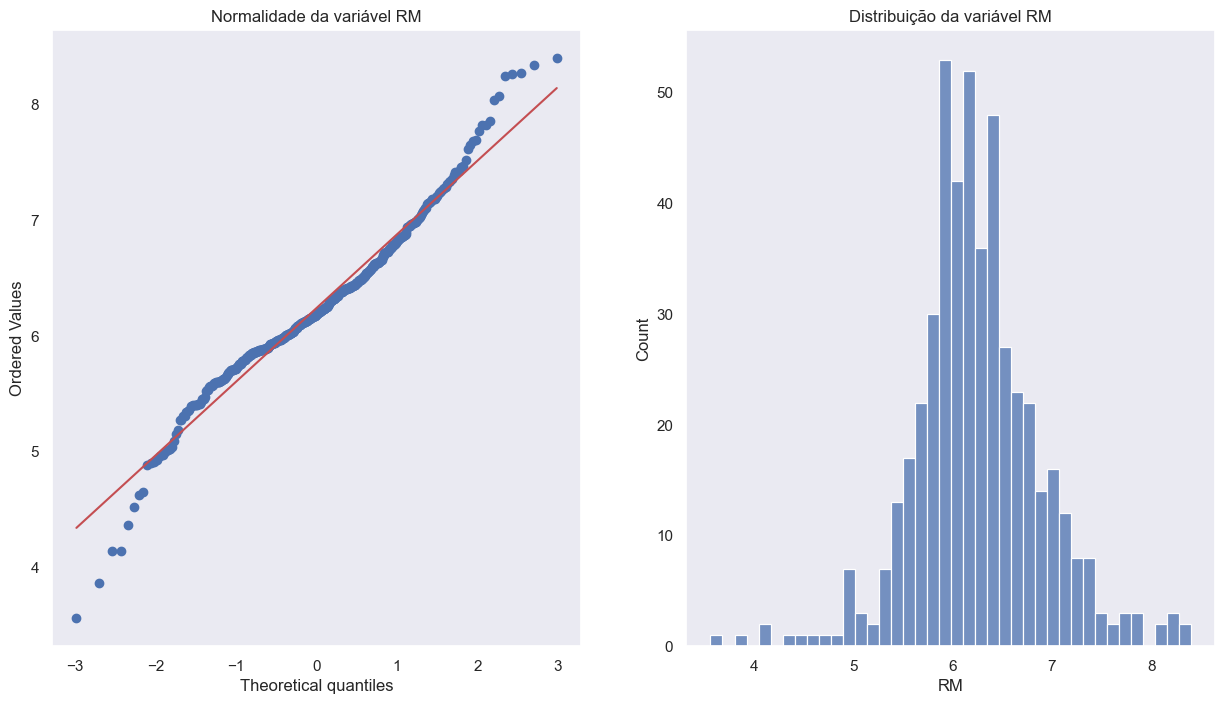

In [171]:
fig, ax = plt.subplots(1,2, figsize=(15, 8))

stats.probplot(df.RM, dist='norm', plot=ax[0])
ax[0].set_title('Normalidade da variável RM')

sns.histplot(df, x='RM', bins=40, ax=ax[1])
ax[1].set_title('Distribuição da variável RM')
plt.show()

In [181]:
estatistica, p = lilliefors(df.RM, dist='norm')
print(f'Estatística do teste {estatistica}')
print(f'p-valor {p}')

Estatística do teste 0.06394344399233598
p-valor 0.0009999999999998899


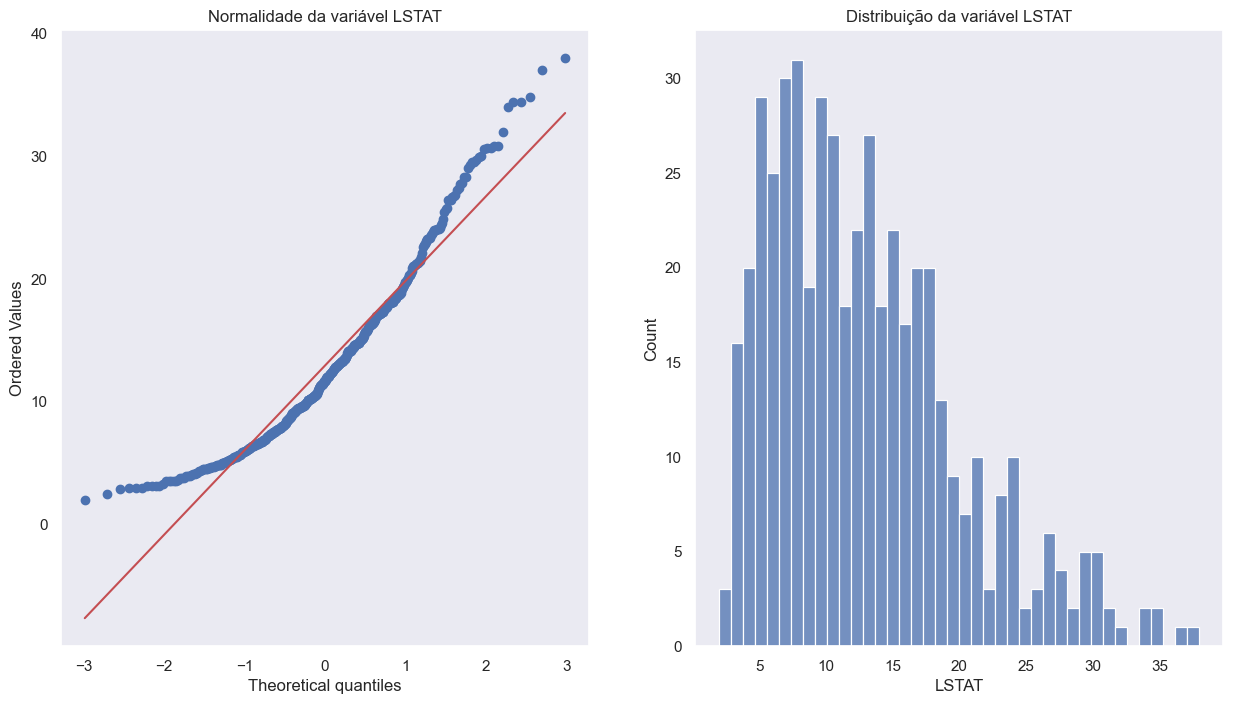

In [172]:
fig, ax = plt.subplots(1,2, figsize=(15, 8))

stats.probplot(df.LSTAT, dist='norm', plot=ax[0])
ax[0].set_title('Normalidade da variável LSTAT')

sns.histplot(df, x='LSTAT', bins=40, ax=ax[1])
ax[1].set_title('Distribuição da variável LSTAT')
plt.show()

In [183]:
estatistica, p = lilliefors(df.LSTAT, dist='norm')
print(f'Estatística do teste {estatistica}')
print(f'p-valor {p}')

Estatística do teste 0.0880483807304932
p-valor 0.0009999999999998899


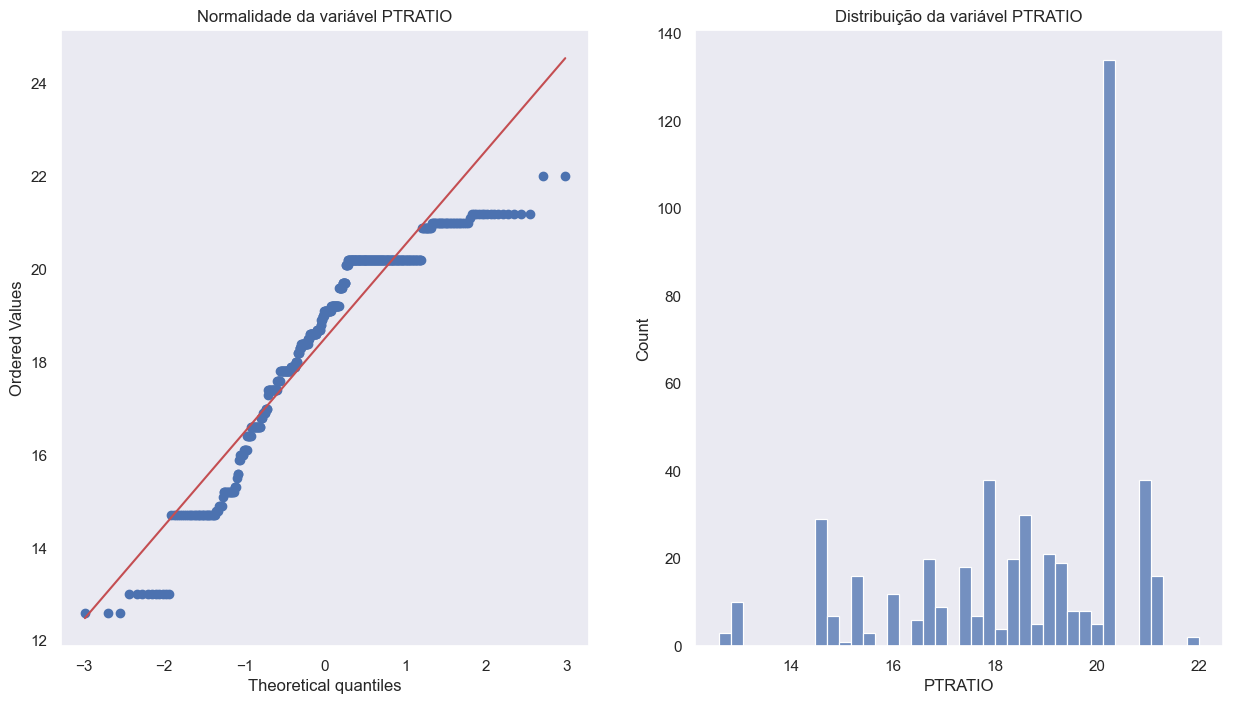

In [173]:
fig, ax = plt.subplots(1,2, figsize=(15, 8))

stats.probplot(df.PTRATIO, dist='norm', plot=ax[0])
ax[0].set_title('Normalidade da variável PTRATIO')

sns.histplot(df, x='PTRATIO', bins=40, ax=ax[1])
ax[1].set_title('Distribuição da variável PTRATIO')
plt.show()

In [184]:
estatistica, p = lilliefors(df.PTRATIO, dist='norm')
print(f'Estatística do teste {estatistica}')
print(f'p-valor {p}')

Estatística do teste 0.17592642312750062
p-valor 0.0009999999999998899


- Nenhuma variável segue uma distribuição normal.

## Correlações

- Pearson(distribuição normal)
- Spearman(distribuição não normal)
- Kendall(distribuição não normal com pequenas amostras)
- p-valor > 0,05 não hà correlação linear
- p-valor <= 0,05 hà correlação linear

No nosso caso usaremos o spearman por se tratar de uma distribuição anormal com uma grande amostra

In [207]:
coef, p = stats.spearmanr(df.MEDV, df.RM)
print(f'p-valor {p}')

p-valor 3.8450286343433253e-54


In [208]:
coef, p = stats.spearmanr(df.MEDV, df.LSTAT)
print(f'p-valor {p}')

p-valor 8.25183845003003e-135


In [209]:
coef, p = stats.spearmanr(df.MEDV, df.PTRATIO)
print(f'p-valor {p}')

p-valor 1.3794858687631326e-41


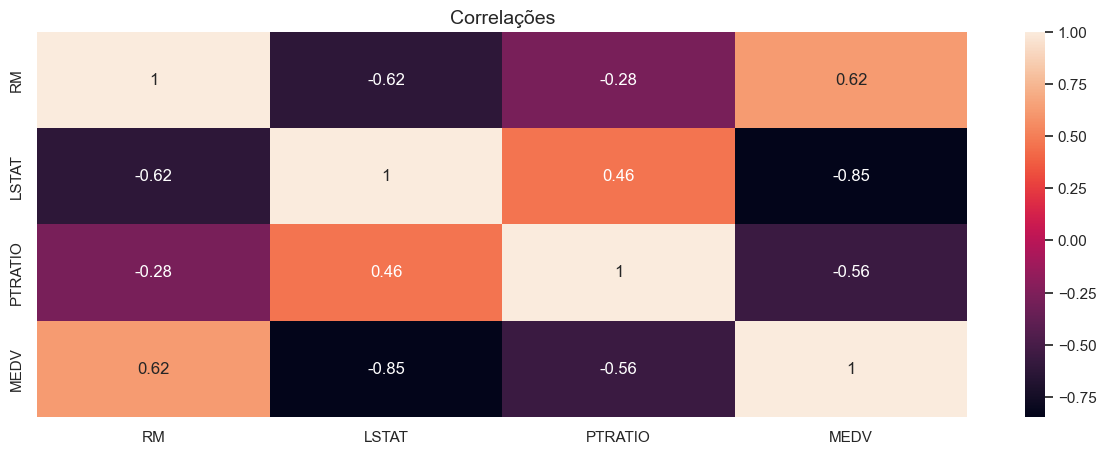

In [218]:
plt.figure(figsize=(15,5))

correlacao = df.corr(method='spearman')
sns.heatmap(correlacao, annot=True)
plt.title('Correlações', fontsize=14)
plt.show()